# Exploring the problem

In this file, we will extract landmark information from the training images of the Kaggle dataset. The reference for the data is provided at the end of this file.


## Steps
1. Import necessary packages and libraries.
2. Explore the image dataset to see how the MediaPipe hands recognizes the hand landmarks.
3. Extract landmarks from all of the images and create the training DataFrame.

### Importing Libraries
* MediaPipe - this is a library used to detect hand "landmarks". This is what I will use to extract data from the training images.
* OpenCV (cv2) - this is a Computer Vision library that I will use to handle images.
* Pandas - this is a widely used library for handling data. It is very powerful and I will be using it as a result.
* NumPy - this is a popular library used for handling arrays. In this case, all of the data extracted from the images will be in the form of arrays.
* MatPlotLib - a popular and easy to use plotting library. I will be using this to initially troubleshoot and ensure that MediaPipe is correctly detecting landmarks.

In [2]:
import os
import mediapipe as mp
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Initial Exploration of the Dataset

I am going to explore the image data by overlaying the hand landmarks generated by MediaPipe over each image. This will allow us some insight on how well MediaPipe is able to recognize the landmarks. 

The following function sets the following colour convention for the following fingers:

    Thumb: Red
    Index: Green
    Middle: Blue
    Ring: Magenta
    Pinky: Yellow

In [3]:
def process_hand_image(image_path):
    # Read and convert image
    img = cv2.imread(filename=image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Initialize MediaPipe hand detection
    mp_drawing = mp.solutions.drawing_utils
    mp_hand = mp.solutions.hands
    hand = mp_hand.Hands()
    
    # Process the image
    result = hand.process(img_rgb)
    
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Define colors for each finger (RGB format)
            # Format: [knuckles_color, tip_color]
            finger_colors = {
                'thumb': [(255, 0, 0), (255, 128, 128)],      # Red
                'index': [(0, 255, 0), (128, 255, 128)],      # Green
                'middle': [(0, 0, 255), (128, 128, 255)],     # Blue
                'ring': [(255, 0, 255), (255, 128, 255)],     # Magenta
                'pinky': [(255, 255, 0), (255, 255, 128)]     # Yellow
            }
            
            # Define landmark indices for each finger
            finger_landmarks = {
                'thumb': [1, 2, 3, 4],
                'index': [5, 6, 7, 8],
                'middle': [9, 10, 11, 12],
                'ring': [13, 14, 15, 16],
                'pinky': [17, 18, 19, 20]
            }
            
            # Palm landmarks (white color)
            palm_landmarks = [0]  # Wrist
            palm_landmarks.extend([1, 5, 9, 13, 17])  # Base of each finger
            
            # Custom drawing specs
            for finger, landmarks in finger_landmarks.items():
                knuckle_color, tip_color = finger_colors[finger]
                
                # Draw connections for this finger
                for i in range(len(landmarks)-1):
                    current_landmark = landmarks[i]
                    next_landmark = landmarks[i+1]
                    
                    # Create connection style
                    connection_style = mp_drawing.DrawingSpec(
                        color=knuckle_color,
                        thickness=2
                    )
                    
                    # Draw connection
                    start_point = hand_landmarks.landmark[current_landmark]
                    end_point = hand_landmarks.landmark[next_landmark]
                    
                    cv2.line(img_rgb,
                            (int(start_point.x * img_rgb.shape[1]), int(start_point.y * img_rgb.shape[0])),
                            (int(end_point.x * img_rgb.shape[1]), int(end_point.y * img_rgb.shape[0])),
                            connection_style.color,
                            connection_style.thickness)
                
                # Draw landmarks
                for idx in landmarks:
                    # Determine if this is a fingertip
                    is_tip = idx in [4, 8, 12, 16, 20]
                    color = tip_color if is_tip else knuckle_color
                    
                    landmark_style = mp_drawing.DrawingSpec(
                        color=color,
                        thickness=5,
                        circle_radius=2
                    )
                    
                    point = hand_landmarks.landmark[idx]
                    cv2.circle(img_rgb,
                             (int(point.x * img_rgb.shape[1]), int(point.y * img_rgb.shape[0])),
                             landmark_style.circle_radius,
                             landmark_style.color,
                             landmark_style.thickness)
            
            # Draw palm landmarks in white
            for idx in palm_landmarks:
                landmark_style = mp_drawing.DrawingSpec(
                    color=(255, 255, 255),
                    thickness=5,
                    circle_radius=2
                )
                
                point = hand_landmarks.landmark[idx]
                cv2.circle(img_rgb,
                         (int(point.x * img_rgb.shape[1]), int(point.y * img_rgb.shape[0])),
                         landmark_style.circle_radius,
                         landmark_style.color,
                         landmark_style.thickness)
    
    return img_rgb

The following function will call the above colouring function and display the result. Seeing this on the raw pictures will allow us to see what kinds of lighting/conditions

In [4]:
def display_hand(letter, pic_num):
    image_path = "data/raw_data/asl_alphabet_train/asl_alphabet_train/" + letter + "/" + letter + pic_num + ".jpg"
    processed_image = process_hand_image(image_path)
    return processed_image
    # # Display result
    # plt.imshow(processed_image)
    # plt.axis('off')
    # plt.xlabel(letter)
    # plt.show()

Lets now display the hands with the MediaPipe overlay!

I0000 00:00:1742422456.380618   39172 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1742422456.405282   41790 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742422456.412673   41796 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742422456.433637   41796 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1742422456.449454   39172 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1742422456.456358   41804 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabli

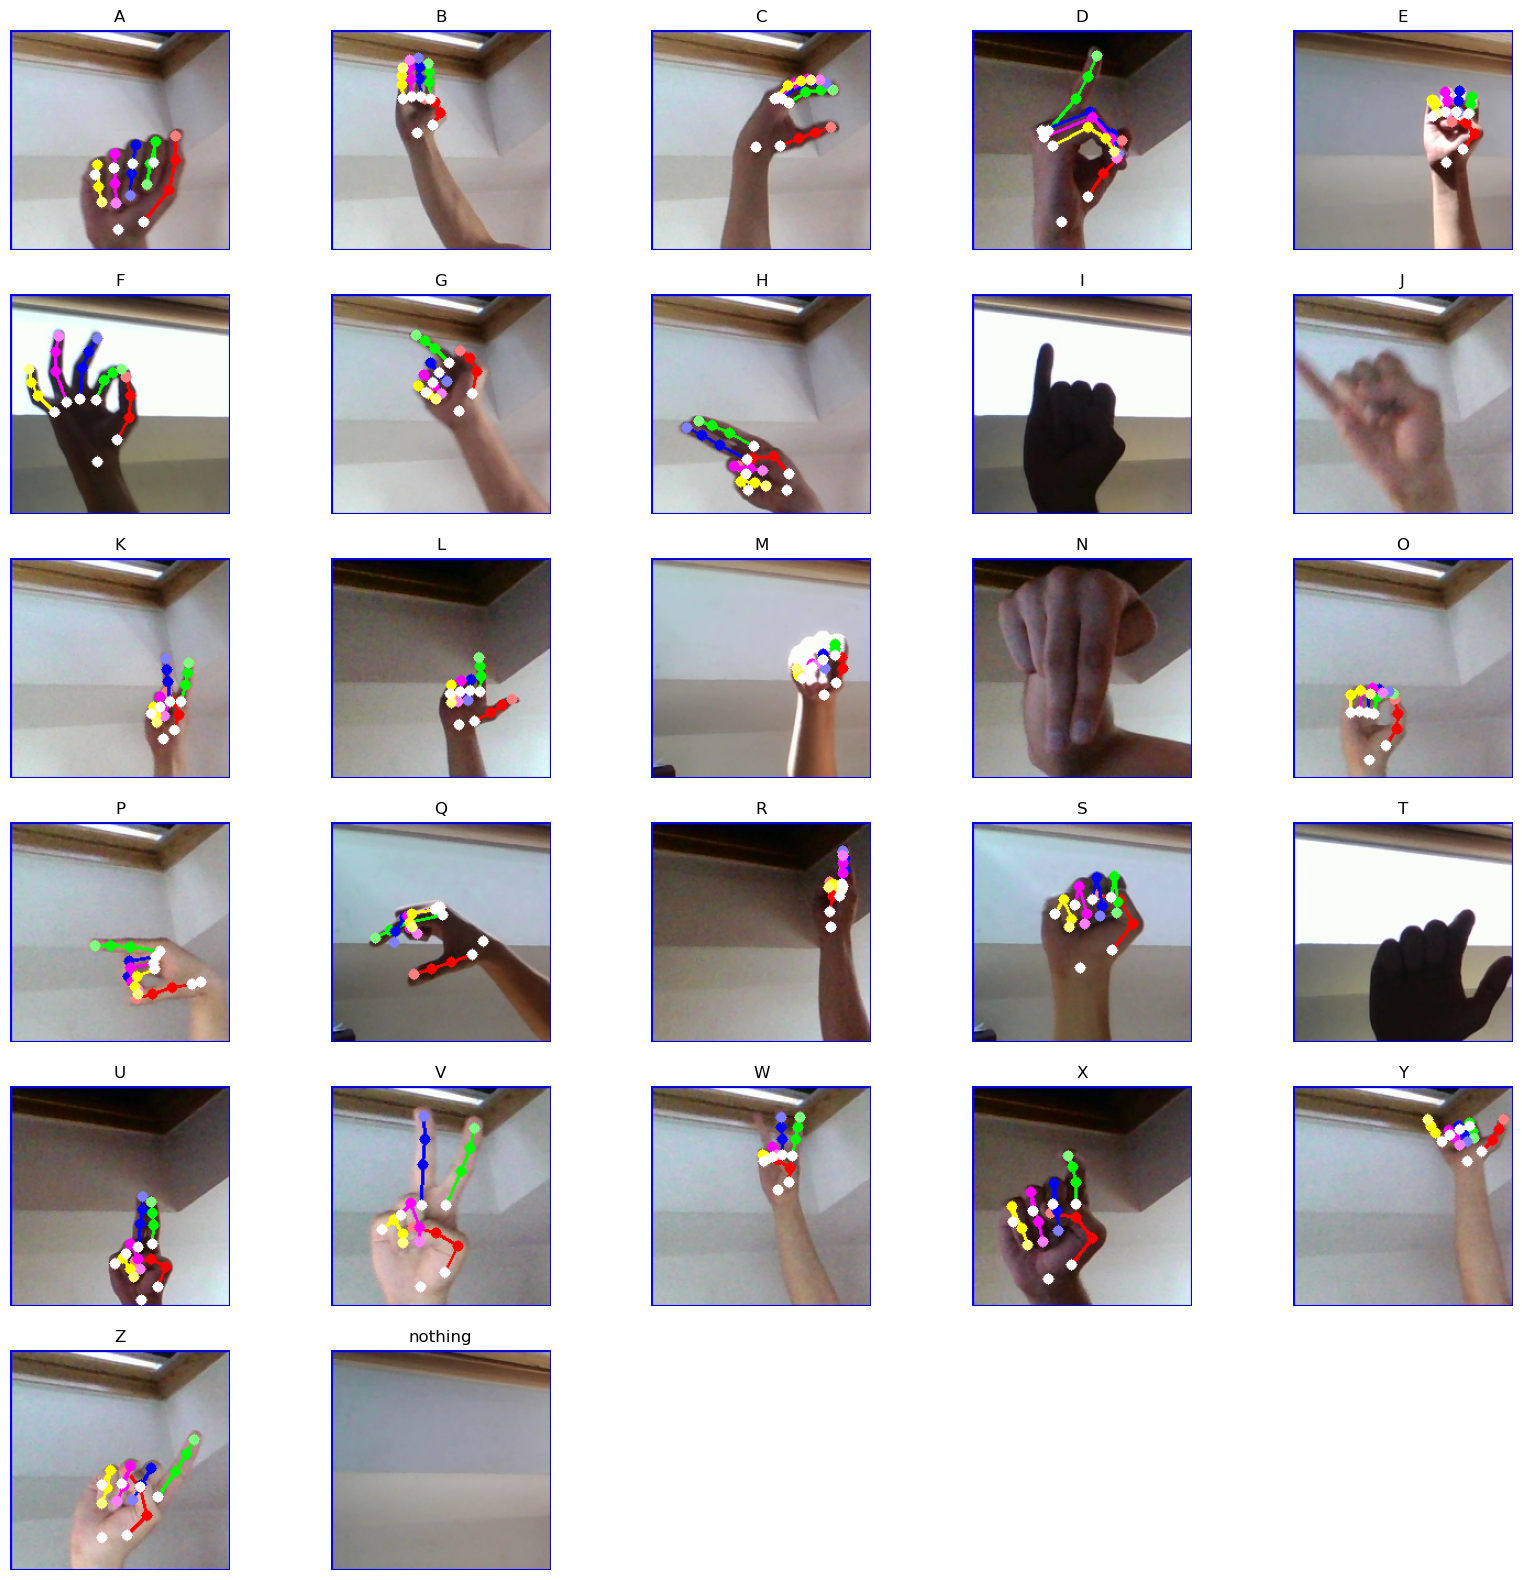

In [5]:
arr = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing']


plt.figure(figsize=(20, 20))

for i in range(len(arr)):
    num = str(random.randint(1, 3000)) # Choosing a random image from the 3000 images each letter has
    img = display_hand(arr[i], num)
    plt.subplot(6, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(arr[i])

*Note: There is ALOT of warnings above the plot. Fear not...these are warnings from MediaPipe since I am using a M1 Mac to run this Jupyter Notebook.*

Now depending on the random image number generated by the code above, we may have some samples of images that are too blurry or too blurry that may be confusing the MediaPipe model. However, looking at the pictures that ARE detected by MediaPipe, it seems to be doing a very good job! Looking at them, it looks like it is correctly colouring each finger as specified in the code above!

Now let's extract the landmarks into a Pandas Dataframe.

In [2]:
import os
import cv2
import pandas as pd
import mediapipe as mp
import numpy as np
from tqdm import tqdm
import gc

raw_data_path = "data/raw_data/asl_alphabet_train/asl_alphabet_train"
train_df = pd.DataFrame()

# Initialize MediaPipe hand detection once outside the loop
mp_hand = mp.solutions.hands
hand = mp_hand.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Get all image files in advance using list comprehension
image_files = [os.path.join(root, name) for root, dirs, files in os.walk(raw_data_path) 
              for name in files if name.lower().endswith('.jpg')]

# Process in smaller batches to manage memory
batch_size = 100
data_rows = []
skipped_count = 0
processed_count = 0

for i in tqdm(range(0, len(image_files), batch_size)):
    batch_files = image_files[i:i+batch_size]
    
    for img_path in batch_files:
        # Extract label from path (assuming folder name is the label)
        label = os.path.basename(os.path.dirname(img_path))
        
        try:
            # Load and process image
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Process the image
            result = hand.process(img_rgb)
            
            # Free memory immediately
            del img, img_rgb
            
            if result.multi_hand_landmarks:
                # Hand was detected, process landmarks
                for hand_landmarks in result.multi_hand_landmarks:
                    # Convert landmarks to flat list
                    landmarks_flat = []
                    for landmark in hand_landmarks.landmark:
                        landmarks_flat.extend([landmark.x, landmark.y, landmark.z])
                    
                    # Add to data rows with image path and label
                    data_rows.append({
                        'image_path': img_path,
                        'label': label,
                        'landmarks': landmarks_flat
                    })
                processed_count += 1
            else:
                # No hand detected, skip this image
                skipped_count += 1
                
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            skipped_count += 1
    
    # Create mini-batch DataFrame and append to main DataFrame
    if data_rows:
        mini_batch_df = pd.DataFrame(data_rows)
        train_df = pd.concat([train_df, mini_batch_df], ignore_index=True)
        data_rows = []  # Clear the list
        
    # Force garbage collection after each batch
    gc.collect()

# Close MediaPipe resources
hand.close()

# Print statistics
print(f"Processing complete. Processed: {processed_count} images, Skipped: {skipped_count} images")

# Save the DataFrame to avoid reprocessing
train_df.to_pickle("hand_landmarks.pkl")

I0000 00:00:1742489740.560773  685024 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1742489740.595937  720994 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1742489740.603270  720995 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 811/811 [32:42<00:00,  2.42s/it]


Processing complete. Processed: 60351 images, Skipped: 20654 images


In [3]:
view = pd.read_pickle("hand_landmarks.pkl")
view.head()

,image_path,label,landmarks
0,data/raw_data/asl_alphabet_train/asl_alphabet_...,R,"[0.7500099539756775, 0.8092923760414124, 8.129..."
1,data/raw_data/asl_alphabet_train/asl_alphabet_...,R,"[0.5013842582702637, 0.1256781816482544, -1.00..."
2,data/raw_data/asl_alphabet_train/asl_alphabet_...,R,"[0.33940061926841736, 0.9188684225082397, 1.87..."
3,data/raw_data/asl_alphabet_train/asl_alphabet_...,R,"[0.3688064515590668, 0.9296466112136841, 1.295..."
4,data/raw_data/asl_alphabet_train/asl_alphabet_...,R,"[0.6972802877426147, 0.852705717086792, 9.3129..."


In [4]:
view.shape

(60351, 3)

To avoid re-processing the data, I will save the extracted training data as a .pkl file. We have a strong amount of training data for each letter in the ASL alphabet. This will be ideal when training our model.

## Acknowledgements

The ASL Alphabet letter images are from a Kaggle dataset produced by Akash Nagaraj.


    Dataset: ASL Alphabet
    Author: Akash Nagaraj
    Source: Kaggle
    URL: https://www.kaggle.com/grassknoted/aslalphabet
    DOI: 10.34740/KAGGLE/DSV/29550